### Extracting the neccessary libraries

In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

### Loading the dataset

In [476]:
df = pd.read_csv('day.csv')

In [477]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### In this dataset no null values present here

In [479]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Converting into datetime:

In [480]:
df['dteday'] =  pd.to_datetime(df['dteday'],format='%d-%m-%Y')

### Extracting the year and Month:

In [481]:
df['year'] = pd.DatetimeIndex(df['dteday']).year
df['month'] = pd.DatetimeIndex(df['dteday']).month

### Dropping the uneccessary variables:

In [482]:
df.drop(['dteday','instant','casual','registered','mnth','yr','holiday'],axis=1,inplace=True)

In [483]:
df.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


### Visualization

### Seasons

In [484]:
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
df['season'] = df['season'].map(codes)

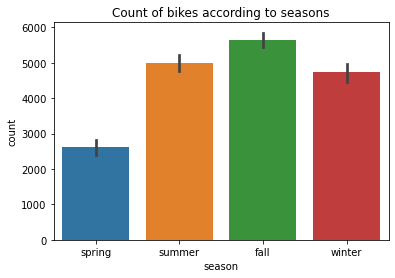

In [485]:
sns.barplot(x='season',y='cnt',data=df)
plt.ylabel('count')
plt.title('Count of bikes according to seasons')
plt.show()

### Conclusion: Fall season have more no of rented bikes.

### Weathersit

In [486]:
df['weathersit'] = df['weathersit'].replace({1:'Clear',2:'Mist',3:'Light_snow',4:'Heavy_rain'})

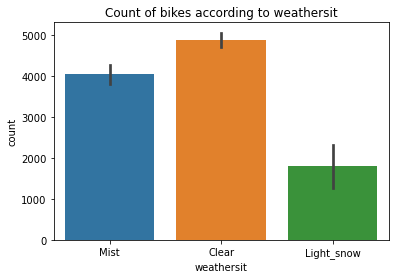

In [487]:
sns.barplot(x='weathersit',y='cnt',data=df)
plt.ylabel('count')
plt.title('Count of bikes according to weathersit')
plt.show()

### Conclusion: Clear weather have more no of rented bikes.

### Working day

In [488]:
df['workingday'] = df['workingday'].replace({1:'Working_day',0:'Holiday'})

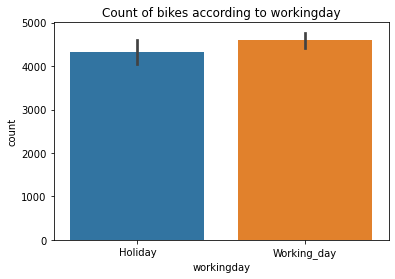

In [489]:
sns.barplot(x='workingday',y='cnt',data=df)
plt.ylabel('count')
plt.title('Count of bikes according to workingday')
plt.show()

### Conclusion: Working_day having more no of rented bikes.

### Year

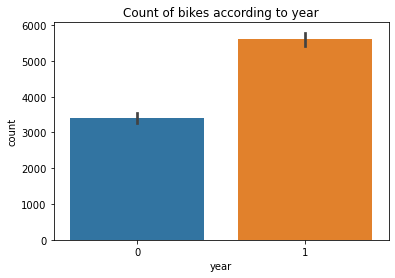

In [490]:
df['year'] = df['year'].replace({2018:0,2019:1})
sns.barplot(x='year',y='cnt',data=df)
plt.ylabel('count')
plt.title('Count of bikes according to year')
plt.show()

### Conclusion: Year 2019 have more no of rented bikes.

### Month

In [491]:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'sep',10:'Oct',11:'Nov',12:'Dec'}
df['month'] = df['month'].map(codes)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


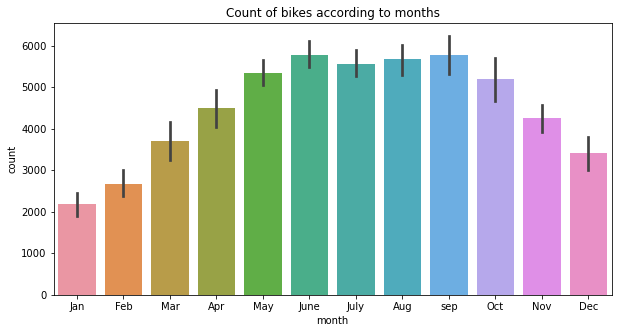

In [492]:
plt.figure(figsize=(10,5))
sns.barplot('month','cnt',data=df)
plt.ylabel('count')
plt.title('Count of bikes according to months')
plt.show()

### Conclusion: Month of sep have more no of rented bikes.

### Weekday

In [493]:
df['weekday'] = df['weekday'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

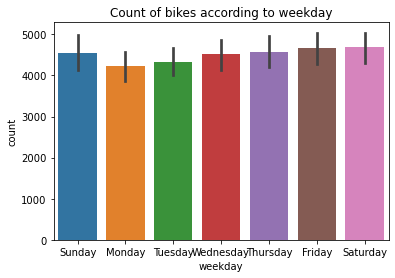

In [494]:
sns.barplot(x='weekday',y='cnt',data=df)
plt.ylabel('count')
plt.title('Count of bikes according to weekday')
plt.show()

### Conclusion: Sunday, Saturday and Friday having more number of rented bikes

### Temp

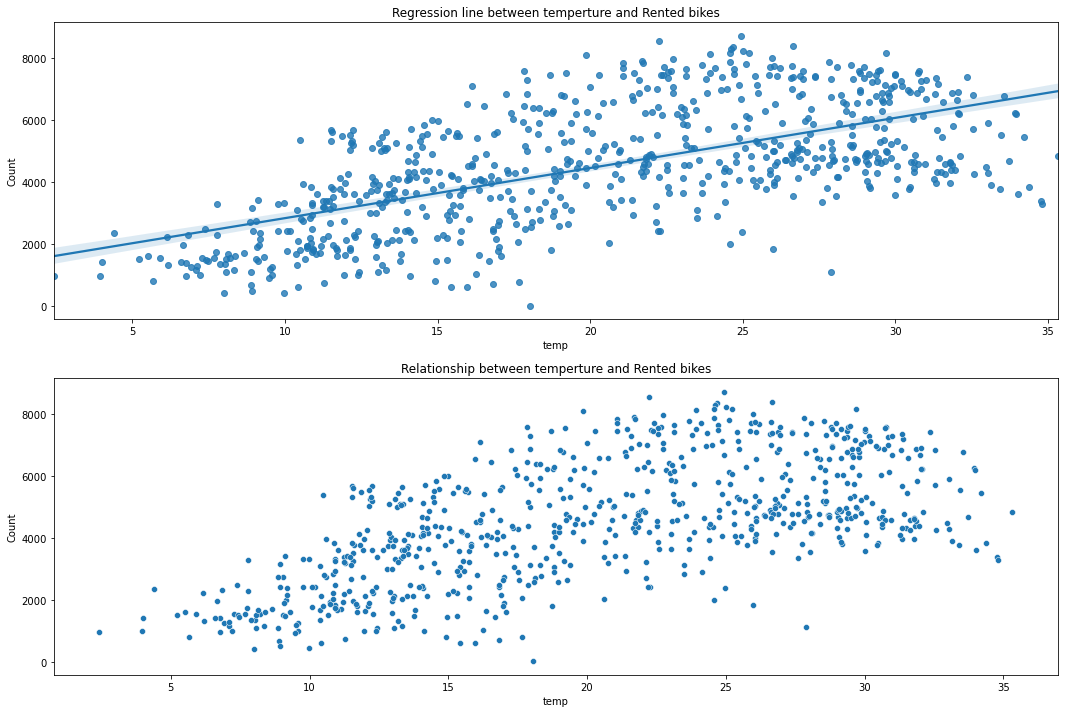

In [495]:
fig, ax = plt.subplots(nrows=2, figsize=(18,12))
g2 = sns.regplot(x='temp',y='cnt',data=df,ax=ax[0])
g1 = sns.scatterplot(x='temp',y='cnt',data=df)
g1.set_title('Relationship between temperture and Rented bikes')
g1.set_ylabel('Count')
g2.set_title('Regression line between temperture and Rented bikes')
g2.set_ylabel('Count')
plt.show()

### Conclusion: variable temp and rented bikes have a linear realtionship.

### Atemp

In [ ]:
fig, ax = plt.subplots(nrows=2, figsize=(18,12))
g2 = sns.regplot(x='atemp',y='cnt',data=df,ax=ax[0])
g1 = sns.scatterplot(x='atemp',y='cnt',data=df)
g1.set_title('Relationship between Atemperture and Rented bikes')
g1.set_ylabel('Count')
g1.set_xlabel('Atemp')
g2.set_title('Regression line between Atemperture and Rented bikes')
g2.set_ylabel('Count')
g2.set_xlabel('Atemp')
plt.show()

### Conclusion: Atemp and rented bike column have a linear relationship

### Windspeed

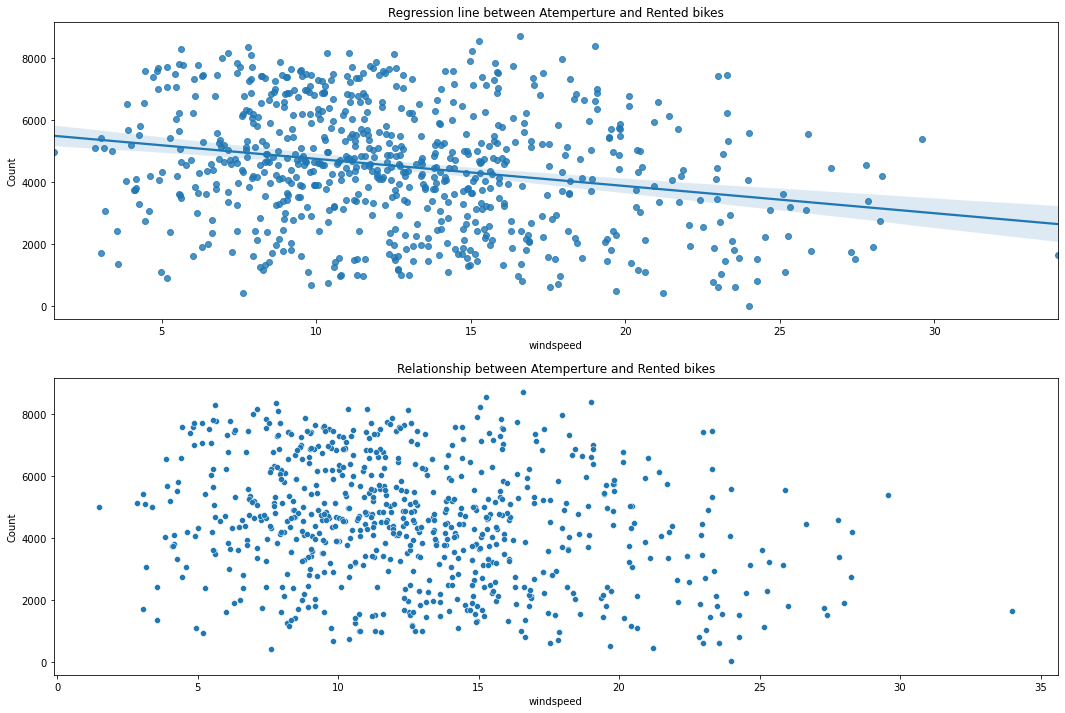

In [497]:
fig, ax = plt.subplots(nrows=2, figsize=(18,12))
g2 = sns.regplot(x='windspeed',y='cnt',data=df,ax=ax[0])
g1 = sns.scatterplot(x='windspeed',y='cnt',data=df)
g1.set_title('Relationship between Atemperture and Rented bikes')
g1.set_ylabel('Count')
g1.set_xlabel('windspeed')
g2.set_title('Regression line between Atemperture and Rented bikes')
g2.set_ylabel('Count')
g2.set_xlabel('windspeed')
plt.show()

### Less windspeed have more no of rented bikes

### Humidity

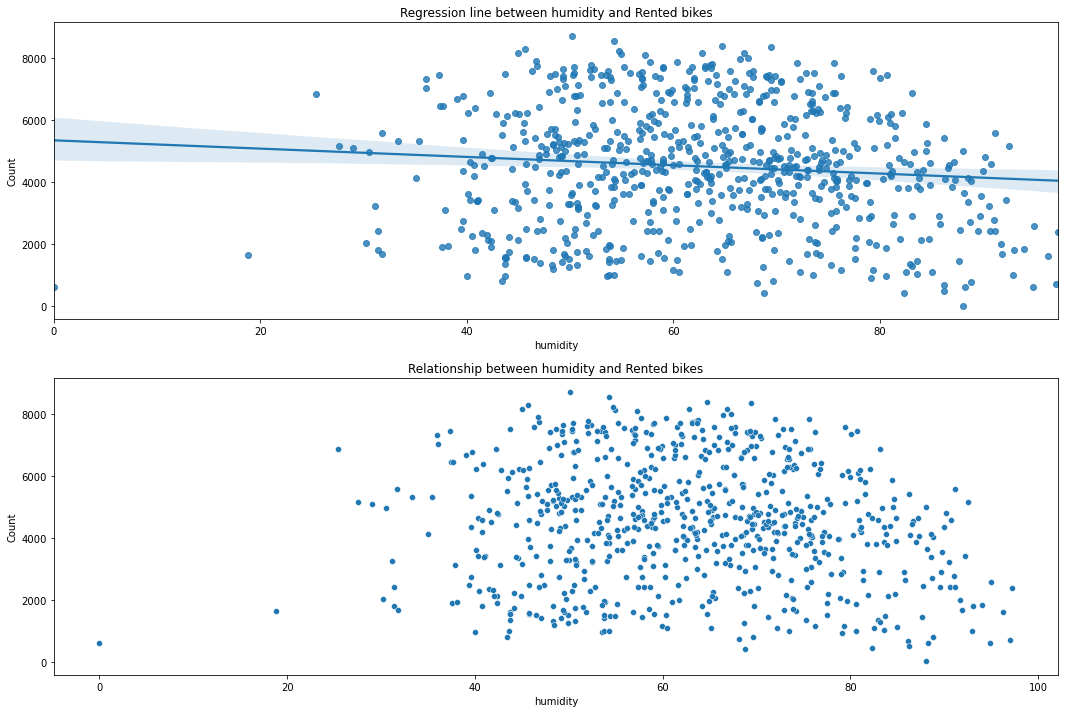

In [498]:
fig, ax = plt.subplots(nrows=2, figsize=(18,12))
g2 = sns.regplot(x='hum',y='cnt',data=df,ax=ax[0])
g1 = sns.scatterplot(x='hum',y='cnt',data=df)
g1.set_title('Relationship between humidity and Rented bikes')
g1.set_ylabel('Count')
g1.set_xlabel('humidity')
g2.set_title('Regression line between humidity and Rented bikes')
g2.set_ylabel('Count')
g2.set_xlabel('humidity')
plt.show()

### More humidity more no of rented bikes.

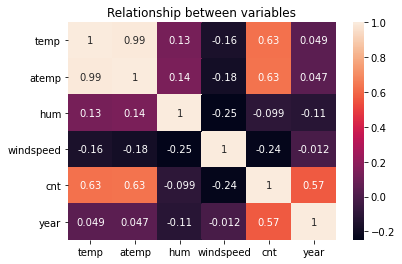

In [499]:
sns.heatmap(df.corr(),annot=True)
plt.title('Relationship between variables')
plt.show()

### Conclusion: Need to drop atemp or temp becoz both are highly co-related.

In [500]:
df.drop('atemp',axis=1,inplace=True)

### Creating the dummy variables:

In [501]:
seasons = pd.get_dummies(df['season'],drop_first=True)
working_day = pd.get_dummies(df['workingday'],drop_first=True)
weather= pd.get_dummies(df['weathersit'],drop_first=True)
month= pd.get_dummies(df['month'],drop_first=True)
week_day= pd.get_dummies(df['weekday'],drop_first=True)

In [502]:
df= pd.concat([df,seasons,working_day,weather,month,week_day],axis=1)

In [503]:
df.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [504]:
df.head()

,temp,hum,windspeed,cnt,year,spring,summer,winter,Working_day,Light_snow,...,May,Nov,Oct,sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Spliting the dataset into train and test datasets

In [505]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Applying Feature scaling:

In [506]:
num_vars = ['temp','hum','windspeed','cnt']
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

<ipython-input-506-943daa4d0c70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-506-943daa4d0c70>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

### Splitting the dataset into train and test on x and y after scaling:

In [507]:
y_train = df_train.pop('cnt')
X_train = df_train

### Applying RFE here becoz their are lot of value after creation of dummy variables:

In [508]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) 
rfe = rfe.fit(X_train, y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [509]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', False, 4),
 ('Working_day', False, 2),
 ('Light_snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 11),
 ('Dec', False, 8),
 ('Feb', False, 9),
 ('Jan', False, 6),
 ('July', True, 1),
 ('June', False, 17),
 ('Mar', False, 18),
 ('May', False, 10),
 ('Nov', False, 7),
 ('Oct', False, 14),
 ('sep', True, 1),
 ('Monday', False, 3),
 ('Saturday', False, 15),
 ('Sunday', True, 1),
 ('Thursday', False, 16),
 ('Tuesday', False, 12),
 ('Wednesday', False, 13)]

In [510]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'year', 'spring', 'Light_snow', 'Mist',
       'July', 'sep', 'Sunday'],
      dtype='object')

In [511]:
X_train_rfe = X_train[col]

### First Model creation:

In [512]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [513]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [514]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.6
Date:                Thu, 03 Mar 2022   Prob (F-statistic):          4.33e-184
Time:                        13:30:05   Log-Likelihood:                 488.62
No. Observations:                 510   AIC:                            -955.2
Df Residuals:                     499   BIC:                            -908.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3766      0.030     12.421      0.000       0.317       0.436
temp           0.4091      0.027     15.413      0.000       0.357       0.461
hum           -0.1247      0.038     -3.244      0.001      -0.200      -0.049
windspeed     -0.1802      0.026     -6.805      0.000      -0.232      -0.128
year           0.2332      0.008     27.653      0.000       0.217       0.250
spring        -0.1483      0.012    -11.944      0.000      -0.173      -0.124
Light_snow    -0.2402      0.027     -8.778      0.000      -0.294      -0.186
Mist          -0.0607      0.011     -5.610      0.000      -0.082      -0.039
July          -0.0794      0.018     -4.464      0.000      -0.114      -0.044
sep            0.0553      0.016      3.445      0.001       0.024       0.087
Sunday         0.0212      0.012      1.842      0.066      -0.001       0.044
==============================================================================
Omnibus:                       59.213   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.976
Skew:                          -0.640   Prob(JB):                     5.97e-29
Kurtosis:                       5.116   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Here we need to drop Sunday variable which having p-value more than 0.05.

In [515]:
X_train1= X_train_rfe.drop('Sunday',1)

In [516]:
X_train2= sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train2).fit() 

In [517]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     266.8
Date:                Thu, 03 Mar 2022   Prob (F-statistic):          1.39e-184
Time:                        13:30:05   Log-Likelihood:                 486.89
No. Observations:                 510   AIC:                            -953.8
Df Residuals:                     500   BIC:                            -911.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3823      0.030     12.642      0.000       0.323       0.442
temp           0.4079      0.027     15.336      0.000       0.356       0.460
hum           -0.1281      0.039     -3.326      0.001      -0.204      -0.052
windspeed     -0.1789      0.027     -6.742      0.000      -0.231      -0.127
year           0.2327      0.008     27.541      0.000       0.216       0.249
spring        -0.1485      0.012    -11.934      0.000      -0.173      -0.124
Light_snow    -0.2386      0.027     -8.702      0.000      -0.292      -0.185
Mist          -0.0600      0.011     -5.534      0.000      -0.081      -0.039
July          -0.0789      0.018     -4.426      0.000      -0.114      -0.044
sep            0.0556      0.016      3.454      0.001       0.024       0.087
==============================================================================
Omnibus:                       53.449   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.640
Skew:                          -0.557   Prob(JB):                     3.17e-28
Kurtosis:                       5.173   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### All Variables  are significant according to their p-value but need to check the vif.

### Checking the VIF

In [518]:
X_train_new= X_train2.drop('const',axis=1)

In [519]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,14.88
0,temp,11.88
2,windspeed,3.94
6,Mist,2.10
3,year,2.03
4,spring,1.84
7,July,1.40
5,Light_snow,1.20
8,sep,1.20


### Here we need drop humidity variable which high VIF.

In [520]:
X_train3= X.drop('hum',1)

In [521]:
X_train2= sm.add_constant(X_train3)
lm1 = sm.OLS(y_train,X_train2).fit() 

In [522]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     292.9
Date:                Thu, 03 Mar 2022   Prob (F-statistic):          1.84e-183
Time:                        13:30:05   Log-Likelihood:                 481.31
No. Observations:                 510   AIC:                            -944.6
Df Residuals:                     501   BIC:                            -906.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3038      0.019     15.890      0.000       0.266       0.341
temp           0.3937      0.027     14.849      0.000       0.342       0.446
windspeed     -0.1525      0.026     -5.962      0.000      -0.203      -0.102
year           0.2356      0.008     27.744      0.000       0.219       0.252
spring        -0.1460      0.013    -11.638      0.000      -0.171      -0.121
Light_snow    -0.2748      0.025    -10.818      0.000      -0.325      -0.225
Mist          -0.0804      0.009     -8.896      0.000      -0.098      -0.063
July          -0.0727      0.018     -4.058      0.000      -0.108      -0.037
sep            0.0531      0.016      3.268      0.001       0.021       0.085
==============================================================================
Omnibus:                       56.658   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.747
Skew:                          -0.593   Prob(JB):                     1.49e-29
Kurtosis:                       5.200   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### All variables are significant , p-value below 0.05.

### Checking the Vif again:

In [523]:
X_train_new1= X_train2.drop('const',axis=1)

In [524]:
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.60
1,windspeed,3.81
2,year,2.03
3,spring,1.52
5,Mist,1.48
6,July,1.33
7,sep,1.20
4,Light_snow,1.06


### conclusion: All variables are having VIF below 5.

### Residuals on train dataset

In [525]:
y_train_pred = lm1.predict(X_train2)

In [526]:
residuals_ = y_train - y_train_pred

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


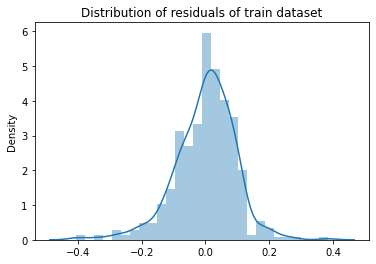

In [527]:
sns.distplot(residuals_)
plt.title('Distribution of residuals of train dataset')
plt.show()

### Conclusion: All error are normally distributed with mean 0.

### Evaluation on Test dataset

In [538]:
y_test = df_test.pop('cnt')
x_test = df_test

In [539]:
x_test_new = x_test[X_train_new1.columns]

In [540]:
x_test_sm = sm.add_constant(x_test_new)

In [541]:
y_test_pred = lm1.predict(x_test_sm)

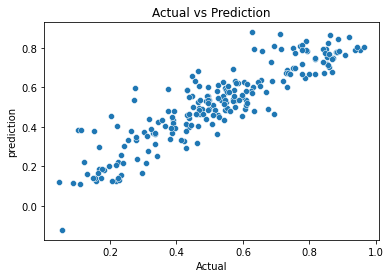

In [543]:
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title('Actual vs Prediction')
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.show()

### R2_score 

In [542]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8017923637355856

### Residuals on test dataset

In [544]:
residuals = y_test - y_test_pred

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


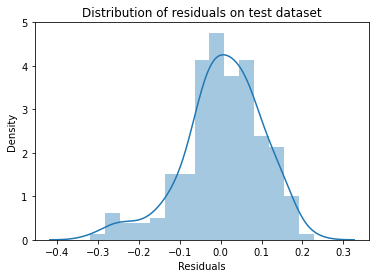

In [546]:
sns.distplot(residuals)
plt.title('Distribution of residuals on test dataset')
plt.xlabel('Residuals')
plt.show()

### Conclusion: All errors are normally distributed with mean 0 

## Final Conclusion:
  - Driver varibales which are affecting on rented bikes column are:
         -Temp : 0.3937
         -Year : 0.2356
         -Light snow : -0.2748
         -Windspeed : -0.1545
         -Spring : -0.1460
  - Errors are normally distributed with mean zero.
  - Here is no multicolinearity.
  - prediction on test dataset and on train dataset are good and having apporimately same r2_score, so it proves no overfitting and underfitting.
  - There is linear relationship between Actual and predicted ones.